In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))


trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

100.0%
Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw

102.8%
Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw

100.0%
Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw

112.7%
C:\Users\Emin\AppData\Local\Programs\Python\Python37\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw

Processing...
Done!
Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(

In [5]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [6]:
for epoch in range(3): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,784))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0019, grad_fn=<NllLossBackward>)
tensor(0.0010, grad_fn=<NllLossBackward>)
tensor(5.3457e-05, grad_fn=<NllLossBackward>)


In [7]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.973


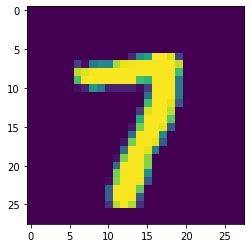

In [16]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [9]:
print(torch.argmax(net(X[0].view(-1,784))[0]))


tensor(7)


In [10]:
a_featureset = X[0]
reshaped_for_network = a_featureset.view(-1,784) # 784 b/c 28*28 image resolution.
output = net(reshaped_for_network) #output will be a list of network predictions.
first_pred = output[0]
print(first_pred)

tensor([-48.6432, -17.1933, -21.6460, -24.0996, -27.4108, -38.2637, -59.6217,
          0.0000, -30.1764, -21.3164], grad_fn=<SelectBackward>)


In [11]:
biggest_index = torch.argmax(first_pred)
print(biggest_index)

tensor(7)
